<div style="background-color:#FFF9DB; border-radius:15px; padding:25px; border:1px solid #F1E6A6;">

<h1 style="color:#2C3E50; text-align:center;">📊 Telco Customer Churn Analysis with Python</h1>


</div>


In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("telco_churn.csv")



<div style="background-color:#FFF9DB; border-radius:12px; padding:20px; border:1px solid #F1E6A6;">
<h2 style="color:#7D6608; text-align:center;">Isınma Turları: Temel Python Sorguları</h2>
<p style="text-align:center; font-size:15px; color:#555;">
Veriyi tanımak, temel fonksiyonları hatırlamak ve analiz öncesi pratik yapmak için mini alıştırmalar yapacağım.
</p>
</div>


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
# toplam satır sayısı?
len(df)

7043

In [5]:
# churn kolonundaki değerleri say
df["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [6]:
# churn kolonundan sadece yes olanları filtrele
df_yes=[df["Churn"]=="Yes"]


In [7]:
# sadece belirli kolonları seç
df[["customerID", "Churn", "tenure"]]


,customerID,Churn,tenure
0,7590-VHVEG,No,1
1,5575-GNVDE,No,34
2,3668-QPYBK,Yes,2
3,7795-CFOCW,No,45
4,9237-HQITU,Yes,2
...,...,...,...
7038,6840-RESVB,No,24
7039,2234-XADUH,No,72
7040,4801-JZAZL,No,11
7041,8361-LTMKD,Yes,4


In [8]:
# ortalama aylık ücret?
df["MonthlyCharges"].mean()

np.float64(64.76169246059918)

<div style="background-color:#FFF9DB; border-radius:12px; padding:20px; border:1px solid #F1E6A6;">
<h2 style="color:#7D6608; text-align:center;">SQL’den Python’a: Aynı Veriyle Yeni Perspektif</h2>
<p style="text-align:center; font-size:15px; color:#555;">
SQL’deki analizleri Python ortamına taşıyarak veriyi farklı açılardan incelemeye başlıyorum.
Bu bölümde Pandas ile grup bazlı analizler, oran hesaplamaları ve görselleştirmeler yapacağım.
</p>
</div>

In [9]:
# tenure a göre churn oranını hesapla
(df["Churn"]=="Yes").groupby(df["tenure"]).mean()

tenure
0     0.000000
1     0.619902
2     0.516807
3     0.470000
4     0.471591
        ...   
68    0.090000
69    0.084211
70    0.092437
71    0.035294
72    0.016575
Name: Churn, Length: 73, dtype: float64

In [10]:
# müşterinin şirkete bıraktığı toplam değeri bul
df["customer_value"]=df["MonthlyCharges"]*df["tenure"]

In [11]:
# churn durumuna göre ortalama customer_value değerini karşılaştır.
df.groupby("Churn")["customer_value"].mean()

Churn
No     2549.770883
Yes    1531.608828
Name: customer_value, dtype: float64

<div style="background-color:#FFF9DB; border-radius:12px; padding:20px; border:1px solid #F1E6A6;">
<h2 style="color:#7D6608; text-align:center;">Orta Seviye Analizler: Pandas ile SQL Mantığını Pekiştirme</h2>

</div>

In [12]:
# contract türüne göre churn oranını hesapla
(df["Churn"]=="Yes").groupby(df["Contract"]).mean()

Contract
Month-to-month    0.427097
One year          0.112695
Two year          0.028319
Name: Churn, dtype: float64

In [13]:
# PaymentMethod’a göre ortalama MonthlyCharges bul
df.groupby("PaymentMethod")["MonthlyCharges"].mean()

PaymentMethod
Bank transfer (automatic)    67.192649
Credit card (automatic)      66.512385
Electronic check             76.255814
Mailed check                 43.917060
Name: MonthlyCharges, dtype: float64

In [14]:
# PaperlessBilling = ‘Yes’ olan müşteriler içinde InternetService = ‘Fiber optic’ oranı
(df["InternetService"]=="Fiber optic").groupby(df["PaperlessBilling"]=="Yes").mean()[True]


np.float64(0.5742028290577799)

In [15]:
# InternetService = "Fiber optic" ve Contract = "Month-to-month" olanlarda churn oranını bul.
segment=df[(df["InternetService"]=="Fiber optic") & (df["Contract"]=="Month-to-month")]["Churn"]
segment_orani=(segment=="Yes").mean()
segment_orani

np.float64(0.5460526315789473)

In [16]:
# her Contract türü için “customer_value” ortalamasını bul, sonra genel ortalamanın üstünde kalan contract türlerini listele.
contract_ortalama=df.groupby("Contract")["customer_value"].mean()
genel_ortalama=df["customer_value"].mean()
ust= contract_ortalama[contract_ortalama > genel_ortalama]
ust


Contract
One year    3029.828955
Two year    3706.759676
Name: customer_value, dtype: float64

In [17]:
# PaymentMethod’a göre churn oranını bul ama yalnızca Fiber optic kullanıcılarını dahil et.
churn_oran = df[df["InternetService"] == "Fiber optic"].groupby("PaymentMethod")["Churn"].apply(lambda x: (x == "Yes").mean())
churn_oran

PaymentMethod
Bank transfer (automatic)    0.289474
Credit card (automatic)      0.252931
Electronic check             0.532288
Mailed check                 0.426357
Name: Churn, dtype: float64

In [18]:
# en yüksek 5 “customer_value” değerine sahip müşterileri getir.
top5 = df.nlargest(5, "customer_value")
top5

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,customer_value
4586,7569-NMZYQ,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),118.75,8672.45,No,8550.0
6118,9924-JPRMC,Male,0,No,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Two year,Yes,Electronic check,118.20,8547.15,No,8510.4
4610,2889-FPWRM,Male,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),117.80,8684.8,Yes,8481.6
3205,3810-DVDQQ,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),117.60,8308.9,No,8467.2
6768,9739-JLPQJ,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Two year,No,Credit card (automatic),117.50,8670.1,No,8460.0


<div style="background-color:#FFF9DB; border-radius:12px; padding:20px; border:1px solid #F1E6A6;">
<h2 style="color:#7D6608; text-align:center;">Veri Görselleştirme</h2>

</div>

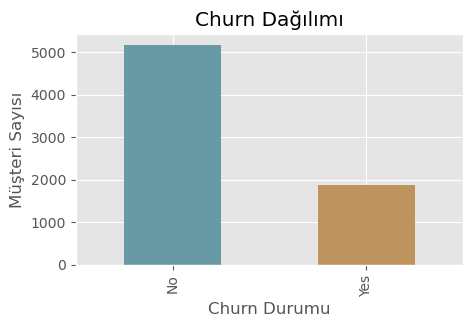

In [19]:
# churn dağılımı

import matplotlib.pyplot as plt

plt.style.use("ggplot")
df["Churn"].value_counts().plot(kind="bar",color=["#689AA6", "#BF935E"],figsize=(5,3),title="Churn Dağılımı")
plt.xlabel("Churn Durumu")
plt.ylabel("Müşteri Sayısı")
plt.show()


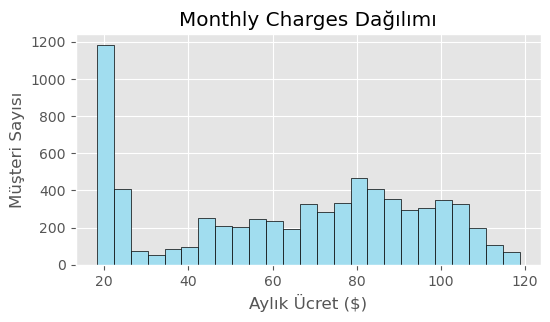

In [21]:
# monthly charges dağılımı
df["MonthlyCharges"].plot(kind="hist",bins=25,color="#A1DDEF",edgecolor="black",figsize=(6,3),title="Monthly Charges Dağılımı")
plt.xlabel("Aylık Ücret ($)")
plt.ylabel("Müşteri Sayısı")
plt.show()

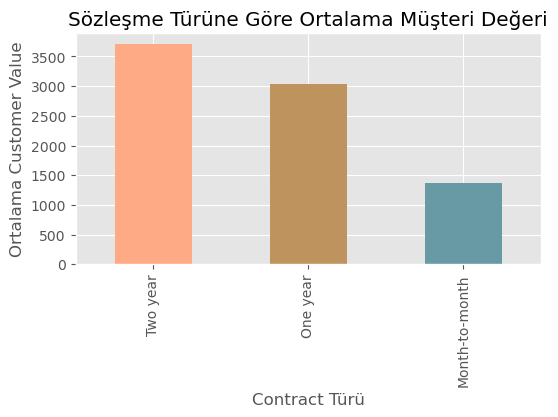

In [24]:
# contract Bazlı Ortalama Customer Value (Bar)
contract_avg = df.groupby("Contract")["customer_value"].mean().sort_values(ascending=False)

contract_avg.plot(kind="bar",color=["#FEAB85", "#BF935E", "#689AA6"],figsize=(6,3),title="Sözleşme Türüne Göre Ortalama Müşteri Değeri")
plt.xlabel("Contract Türü")
plt.ylabel("Ortalama Customer Value")
plt.show()